IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

LOADING THE DATASET

In [4]:
fraud_train = pd.read_csv("fraudTrain.csv", header = 0, engine = 'python')
fraud_test = pd.read_csv("fraudTest.csv", header = 0, engine = 'python')

In [5]:
fraud_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [6]:
fraud_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0


In [7]:
fraud_train.shape

(58368, 23)

In [8]:
fraud_test.shape

(70004, 23)

In [9]:
fraud_train.size

1342464

In [10]:
fraud_test.size

1610092

In [11]:
fraud_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,58368.000000,5.836800e+04,58368.000000,58368.000000,58367.000000,58367.000000,5.836700e+04,5.836700e+04,58367.000000,58367.000000,58367.000000
mean,29183.500000,4.221178e+17,71.647710,48621.683028,38.527595,-90.165879,8.995036e+04,1.326866e+09,38.527004,-90.169096,0.009817
std,16849.534593,1.316011e+18,145.954037,26965.880962,5.085597,13.863111,3.027075e+05,8.571242e+05,5.117780,13.876946,0.098595
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,14591.750000,1.800429e+14,9.740000,25526.000000,34.668900,-96.786900,7.430000e+02,1.326083e+09,34.763074,-96.858282,0.000000
50%,29183.500000,3.519233e+15,47.995000,48088.000000,39.354300,-87.410100,2.456000e+03,1.326866e+09,39.356948,-87.340922,0.000000
75%,43775.250000,4.635331e+15,83.702500,72011.000000,41.846700,-80.065200,2.047800e+04,1.327641e+09,41.914133,-80.126747,0.000000
max,58367.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.328354e+09,66.659242,-66.967742,1.000000


In [12]:
fraud_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,70004.000000,7.000400e+04,70003.000000,70003.000000,70003.000000,70003.000000,7.000300e+04,7.000300e+04,70003.000000,70003.000000,70003.000000
mean,35001.500000,4.138791e+17,68.912744,48751.541034,38.554475,-90.181664,8.946728e+04,1.372839e+09,38.550762,-90.181840,0.003971
std,20208.558459,1.304221e+18,142.513978,26843.600866,5.066480,13.685861,3.025676e+05,6.099616e+05,5.101735,13.698677,0.062893
min,0.000000,6.547670e+05,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.646251,0.000000
25%,17500.750000,1.800429e+14,9.650000,26237.000000,34.668900,-96.790900,7.430000e+02,1.372344e+09,34.762921,-96.857445,0.000000
50%,35001.500000,3.519607e+15,47.020000,48174.000000,39.376400,-87.458100,2.435000e+03,1.372858e+09,39.380453,-87.407097,0.000000
75%,52502.250000,4.633538e+15,82.830000,72011.000000,42.014400,-80.175200,2.000650e+04,1.373359e+09,41.974816,-80.249048,0.000000
max,70003.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373846e+09,66.669356,-66.952352,1.000000


In [17]:
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             58368 non-null  int64  
 1   trans_date_trans_time  58368 non-null  object 
 2   cc_num                 58368 non-null  int64  
 3   merchant               58368 non-null  object 
 4   category               58368 non-null  object 
 5   amt                    58368 non-null  float64
 6   first                  58368 non-null  object 
 7   last                   58368 non-null  object 
 8   gender                 58368 non-null  object 
 9   street                 58368 non-null  object 
 10  city                   58368 non-null  object 
 11  state                  58368 non-null  object 
 12  zip                    58368 non-null  int64  
 13  lat                    58367 non-null  float64
 14  long                   58367 non-null  float64
 15  ci

In [16]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70004 entries, 0 to 70003
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             70004 non-null  int64  
 1   trans_date_trans_time  70004 non-null  object 
 2   cc_num                 70004 non-null  int64  
 3   merchant               70003 non-null  object 
 4   category               70003 non-null  object 
 5   amt                    70003 non-null  float64
 6   first                  70003 non-null  object 
 7   last                   70003 non-null  object 
 8   gender                 70003 non-null  object 
 9   street                 70003 non-null  object 
 10  city                   70003 non-null  object 
 11  state                  70003 non-null  object 
 12  zip                    70003 non-null  float64
 13  lat                    70003 non-null  float64
 14  long                   70003 non-null  float64
 15  ci

In [18]:
fraud_train.isnull().values.any()

True

In [20]:
fraud_train = fraud_train.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58362,58362,2019-02-04 11:15:48,4640395708703,fraud_Kris-Padberg,shopping_pos,2.87,Melissa,Krause,F,67632 Martin Gateway,...,30.6576,-91.6264,1178.0,Community education officer,1951-06-13,82d72cab5e1849aa82bca281592a6d79,1.328354e+09,30.324670,-91.688827,0.0
58363,58363,2019-02-04 11:17:01,3560697798177746,"fraud_Parker, Nolan and Trantow",entertainment,1.26,Matthew,Young,M,8840 Miller Port Suite 645,...,33.7163,-116.3381,4677.0,Learning mentor,1955-05-06,a352df6dfcf2f822fb3d1bcfcdf9cd68,1.328354e+09,33.275958,-116.709397,0.0
58364,58364,2019-02-04 11:17:03,374930071163758,fraud_Bradtke PLC,grocery_pos,60.16,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515.0,Police officer,1971-11-05,0ef10c6a11fa216a506c680bffe8dfb9,1.328354e+09,42.109542,-83.093099,0.0
58365,58365,2019-02-04 11:18:07,2286236465059468,"fraud_Gottlieb, Considine and Schultz",shopping_net,21.02,Morgan,Murray,F,2788 Brittney Island,...,38.5319,-93.9221,467.0,Agricultural consultant,1950-05-27,e93bd517f49f6a67c145a5284cbdc369,1.328354e+09,39.123804,-94.719088,0.0


In [21]:
fraud_train.isnull().values.any()

False

In [22]:
fraud_test.isnull().values.any()

True

In [23]:
fraud_test = fraud_test.dropna()

In [24]:
fraud_test.isnull().values.any()

False

In [25]:
fraud_train = fraud_train.drop_duplicates()

In [26]:
fraud_test = fraud_test.drop_duplicates()

In [27]:
fraud_train.count()

,0
Unnamed: 0,58367
trans_date_trans_time,58367
cc_num,58367
merchant,58367
category,58367
amt,58367
first,58367
last,58367
gender,58367
street,58367


In [28]:
fraud_test.count()

,0
Unnamed: 0,70003
trans_date_trans_time,70003
cc_num,70003
merchant,70003
category,70003
amt,70003
first,70003
last,70003
gender,70003
street,70003


In [29]:
combined_data = pd.concat([fraud_train,fraud_test], axis = 0)
combined_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [30]:
combined_data.shape

(128370, 23)

In [31]:
combined_data.size

2952510

In [32]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128370 entries, 0 to 70002
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             128370 non-null  int64  
 1   trans_date_trans_time  128370 non-null  object 
 2   cc_num                 128370 non-null  int64  
 3   merchant               128370 non-null  object 
 4   category               128370 non-null  object 
 5   amt                    128370 non-null  float64
 6   first                  128370 non-null  object 
 7   last                   128370 non-null  object 
 8   gender                 128370 non-null  object 
 9   street                 128370 non-null  object 
 10  city                   128370 non-null  object 
 11  state                  128370 non-null  object 
 12  zip                    128370 non-null  float64
 13  lat                    128370 non-null  float64
 14  long                   128370 non-null  fl

In [34]:
combined_data.drop(labels = ["first", "last", "job", "dob","trans_num","street","trans_date_trans_time","city","state"], axis = 1, inplace = True)
combined_data.head(3)

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0


VISUALIZATION OF DATASET

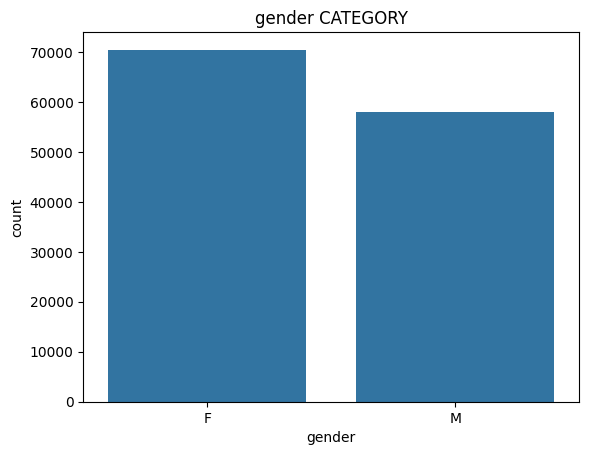

In [36]:
sns.countplot(x = 'gender', data = combined_data)
plt.title("gender CATEGORY")
plt.show()

In [40]:
combined_data = combined_data().astype('category').cat.codes
correlation_matrix = combined_data.corr()
plt.figure(figsize=(14,10))
sns.headmap(correlation_matrix, cmap = 'coolwarm', fmt = ".2f")
plt.title("CORRELATION MATRIX FOR FRAUD DETECTION")
plt.show()

TypeError: 'DataFrame' object is not callable

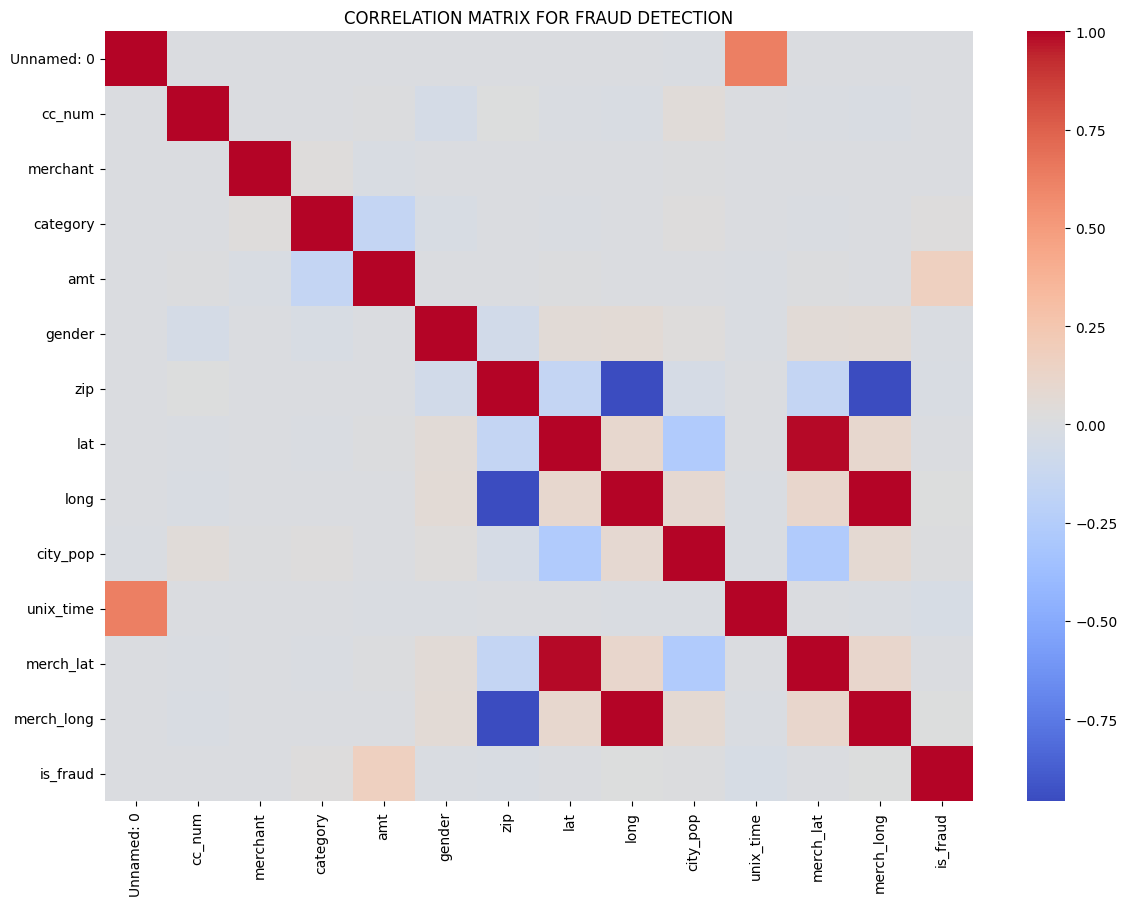

In [41]:
# Convert all columns to categorical and get category codes
combined_data = combined_data.astype('category').apply(lambda x: x.cat.codes)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = ".2f")
plt.title("CORRELATION MATRIX FOR FRAUD DETECTION")
plt.show()

PREPROCESS THE DATA

In [42]:
encoder = LabelEncoder()
new_col0 = encoder.fit_transform(combined_data['merchant'].values)
combined_data['merchant_new'] = new_col0
combined_data.drop(labels = ['merchant'], axis = 1, inplace = True)

In [43]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(combined_data['category'].values)
combined_data['category_new'] = new_col1
combined_data.drop(labels = ['category'], axis = 1, inplace = True)

In [46]:
combined_data = pd.get_dummies(combined_data)

In [47]:
combined_data.head()

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new
0,0,420,397,0,244,272,651,450,0,39358,86261,0,514,8
1,1,38,10600,0,902,901,55,42,1,127236,7683,0,241,4
2,2,221,18290,1,803,683,80,473,2,106331,11821,0,390,0
3,3,479,4400,1,573,870,83,363,3,123879,11490,0,360,2
4,4,347,4096,1,212,369,706,22,4,56494,103006,0,297,9


In [48]:
x = combined_data.drop("is_fraud", axis = 1)
y = combined_data["is_fraud"]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

TRAIN LOGISTIC REGRESSION

In [50]:
new_model = LogisticRegression()
new_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
new_predictions = new_model.predict(x_test)

In [53]:
print("LOGISTIC REGRESSION MODEL FOR FRAUD DETECTION:")
print(confusion_matrix(y_test,new_predictions))
print(classification_report(y_test,new_predictions))
print("Accuracy:", accuracy_score(y_test, new_predictions))

LOGISTIC REGRESSION MODEL FOR FRAUD DETECTION:
[[31893     0]
 [  200     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31893
           1       0.00      0.00      0.00       200

    accuracy                           0.99     32093
   macro avg       0.50      0.50      0.50     32093
weighted avg       0.99      0.99      0.99     32093

Accuracy: 0.9937681114261677


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN DECISION TREE MODEL

In [55]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
tree_predictions = tree_model.predict(x_test)

In [58]:
print("DECISION TREE MODEL FOR FRAUD DETECTION:")
print(confusion_matrix(y_test,tree_predictions))
print(classification_report(y_test,tree_predictions))
print("Accuracy:",accuracy_score(y_test, tree_predictions))

DECISION TREE MODEL FOR FRAUD DETECTION:
[[31797    96]
 [   76   124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31893
           1       0.56      0.62      0.59       200

    accuracy                           0.99     32093
   macro avg       0.78      0.81      0.79     32093
weighted avg       0.99      0.99      0.99     32093

Accuracy: 0.9946405758265042


TRAIN RANDOM FOREST MODEL

In [59]:
rfm_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=40)
rfm_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=40)

In [62]:
rfm_predictions = rfm_model.predict(x_test)

print("RANDOM FOREST MODEL FOR FRAUD DETECTION:")
print(confusion_matrix(y_test,rfm_predictions))
print(classification_report(y_test, rfm_predictions))
print("Accuracy: ",accuracy_score(y_test, rfm_predictions))

RANDOM FOREST MODEL FOR FRAUD DETECTION:
[[31886     7]
 [   71   129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31893
           1       0.95      0.65      0.77       200

    accuracy                           1.00     32093
   macro avg       0.97      0.82      0.88     32093
weighted avg       1.00      1.00      1.00     32093

Accuracy:  0.9975695634562054
